In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#1. 데이터 요약하기
# 고객 만족도 데이터 생성 (1~10점 척도)
np.random.seed(42)
satisfaction_scores = np.random.normal(7.5, 1.5, 1000)
satisfaction_scores = np.clip(satisfaction_scores, 1, 10)  # 1~10점 범위로 제한

# 데이터프레임 생성
customer_data = pd.DataFrame({
    'customer_id': range(1, 1001),
    'satisfaction_score': satisfaction_scores
})

print("🛍️ 온라인 쇼핑몰 고객 만족도 데이터")
print(customer_data.head())


🛍️ 온라인 쇼핑몰 고객 만족도 데이터
   customer_id  satisfaction_score
0            1            8.245071
1            2            7.292604
2            3            8.471533
3            4            9.784545
4            5            7.148770


In [ ]:
#1.1. 고객 만족도의 평균, 중앙값, 최빈값을 계산
print('고객 만족도의 평균: ', customer_data['satisfaction_score'].mean())
print('고객 만족도의 중앙값: ', customer_data['satisfaction_score'].median())
print('고객 만족도의 최빈값: ', customer_data['satisfaction_score'].mode())

고객 만족도의 평균:  7.496515139219837
고객 만족도의 중앙값:  7.537950918352332
고객 만족도의 최빈값:  0    10.0
Name: satisfaction_score, dtype: float64


<Axes: xlabel='satisfaction_score', ylabel='Count'>

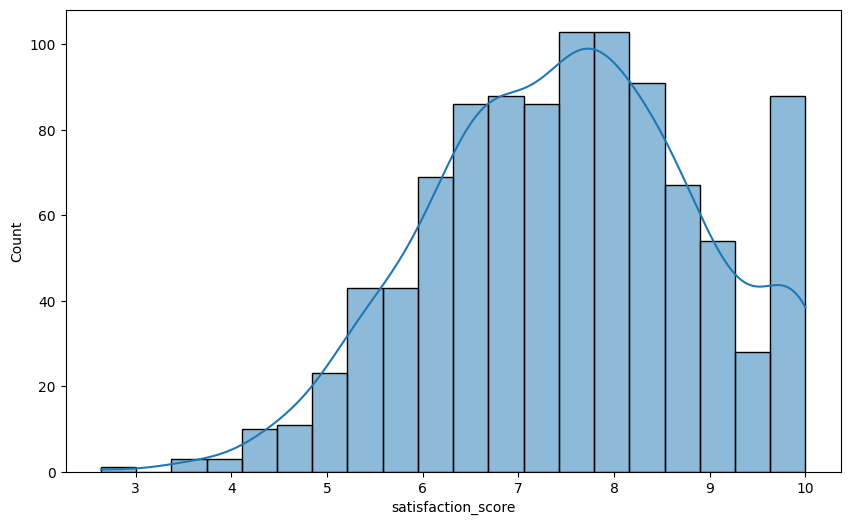

In [ ]:
#1.2. 히스토그램을 그려서 데이터 분포를 확인
plt.figure(figsize=(10, 6))
sns.histplot(customer_data['satisfaction_score'], bins=20, kde=True)

In [ ]:
#1.3. 평균 만족도는 몇 점인가
print('평균 만족도: ', customer_data['satisfaction_score'].mean())

평균 만족도:  7.496515139219837


In [ ]:
#1.3. 전체 고객 중 만족도 8점 이상인 고객의 비율
print('만족도 8점 이상 고객 비율: ', (customer_data['satisfaction_score'] >= 8).mean())

만족도 8점 이상 고객 비율:  0.365


In [ ]:
#1.3. CEO에게 보고할 한 줄 요약: 우리 고객 만족도는 10점 만점에 평균 7.5점이며, 고객의 0.4%가 8점 이상의 높은 만족도를 보입니다

In [ ]:
#2. 대표값 비교하기

# 두 지역의 월급 데이터 생성
np.random.seed(123)

# A지역: 일반적인 분포
region_a_salary = np.random.normal(300, 50, 100)  # 평균 300만원

# B지역: 소수의 고소득자가 있는 분포
region_b_normal = np.random.normal(280, 40, 95)  # 대부분 280만원
region_b_high = np.random.normal(1500, 200, 5)   # 소수 고소득자
region_b_salary = np.concatenate([region_b_normal, region_b_high])

salary_data = pd.DataFrame({
    'region': ['A']*100 + ['B']*100,
    'salary': np.concatenate([region_a_salary, region_b_salary])
})

print("💰 두 지역 월급 데이터")
print(salary_data.groupby('region')['salary'].describe())


💰 두 지역 월급 데이터
        count        mean         std         min         25%         50%  \
region                                                                      
A       100.0  301.355454   56.696217  160.070545  258.362729  297.336513   
B       100.0  333.545926  239.553122  177.717816  258.593342  285.284835   

               75%          max  
region                           
A       349.169418   419.618263  
B       305.918175  1477.829856  


In [ ]:
#2.1. 각 지역의 평균과 중앙값 계산하기
print('A지역의 평균 월급: ', salary_data[salary_data['region'] == 'A']['salary'].mean())
print('A지역의 중앙값 월급: ', salary_data[salary_data['region'] == 'A']['salary'].median())
print('B지역의 평균 월급: ', salary_data[salary_data['region'] == 'B']['salary'].mean())
print('B지역의 중앙값 월급: ', salary_data[salary_data['region'] == 'B']['salary'].median())

A지역의 평균 월급:  301.355453674518
A지역의 중앙값 월급:  297.3365134146072
B지역의 평균 월급:  333.545926008342
B지역의 중앙값 월급:  285.2848349380927


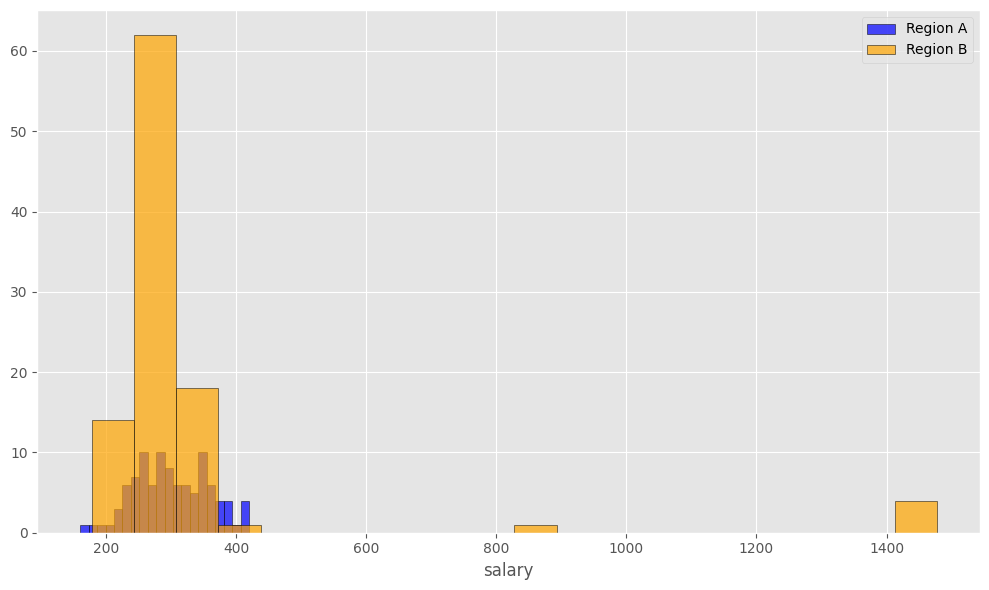

In [ ]:
#2.2. 두 지역의 월급 분포 비교 히스토그램
plt.style.use('ggplot')

plt.figure(figsize=(10, 6))
plt.hist(salary_data[salary_data['region'] == 'A']['salary'],
         bins=20, alpha=0.7, label='Region A', color='blue', edgecolor='black')
plt.hist(salary_data[salary_data['region'] == 'B']['salary'],
         bins=20, alpha=0.7, label='Region B', color='orange', edgecolor='black')

plt.xlabel('salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#2.3. 어느 지역이 더 살기 좋은지 판단할 때 평균과 중앙값 중 어떤 것이 더 적절한지 설명
#이상치가 많이 있다고 판단할 때(B 지역)는 평균이 왜곡될 수 있기 때문에 중앙값을 선택하는 것이 적절하다

In [ ]:
#3. 산포도 측정

# 두 반의 수학 성적 데이터
np.random.seed(456)

# 1반: 평균 75점, 표준편차 작음 (고른 성적)
class_1_scores = np.random.normal(75, 8, 30)

# 2반: 평균 75점, 표준편차 큼 (성적 편차 심함)
class_2_scores = np.random.normal(75, 20, 30)

scores_data = pd.DataFrame({
    'class': ['1반']*30 + ['2반']*30,
    'score': np.concatenate([class_1_scores, class_2_scores])
})

print("📚 두 반의 수학 성적 데이터")
print(scores_data.head())


📚 두 반의 수학 성적 데이터
  class      score
0    1반  69.654972
1    1반  71.014324
2    1반  79.948607
3    1반  79.549538
4    1반  85.804076


In [ ]:
#3.1. 각 반의 평균, 분산, 표준편차 계산
print('1반의 평균: ', scores_data[scores_data['class'] == '1반']['score'].mean())
print('1반의 분산: ', scores_data[scores_data['class'] == '1반']['score'].var())
print('1반의 표준편차: ', scores_data[scores_data['class'] == '1반']['score'].std())

print('2반의 평균: ', scores_data[scores_data['class'] == '2반']['score'].mean())
print('2반의 분산: ', scores_data[scores_data['class'] == '2반']['score'].var())
print('2반의 표준편차: ', scores_data[scores_data['class'] == '2반']['score'].std())

1반의 평균:  76.580737573139
1반의 분산:  58.36158409441021
1반의 표준편차:  7.6394753808367115
2반의 평균:  73.80041434990041
2반의 분산:  317.2862489875249
2반의 표준편차:  17.812530673307624


<Axes: xlabel='class', ylabel='score'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


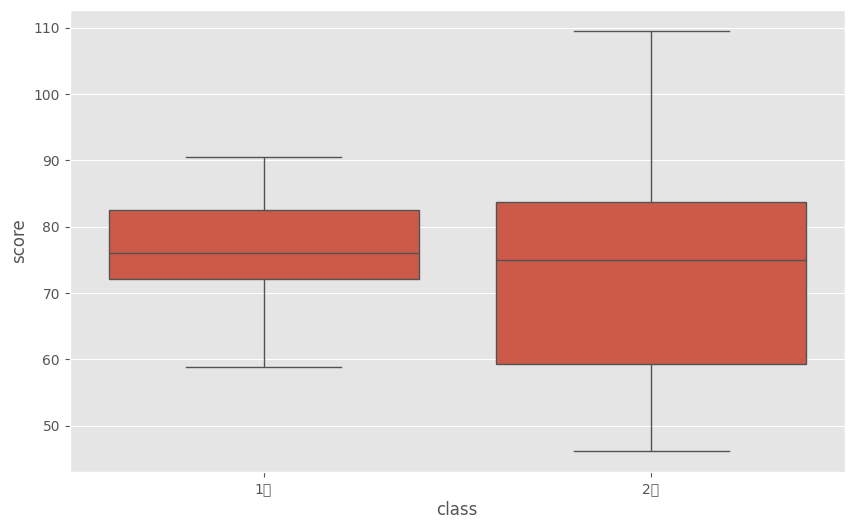

In [ ]:
#박스플랏으로 두 반의 성적 분포 비교
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='score', data=scores_data)

In [ ]:
#3.3. 어느 반이 더 안정적인 성적을 보이는가
#1반의 분산이 더 작기 때문에(데이터 간의 분산이 작다 = 차이가 적다 = 비슷한 성적을 가진다) 더 안정적이다

In [ ]:
#4. 데이터 유형 구하기

# 카페 고객 데이터 생성
np.random.seed(789)

n_customers = 200
coffee_types = ['아메리카노', '라떼', '카푸치노', '에스프레소']
sizes = ['Small', 'Medium', 'Large']

cafe_data = pd.DataFrame({
    'customer_id': range(1, n_customers+1),
    'age': np.random.randint(18, 65, n_customers),  # 연속형 (실제로는 이산형이지만 연속형으로 간주)
    'coffee_type': np.random.choice(coffee_types, n_customers),  # 범주형
    'size': np.random.choice(sizes, n_customers),  # 순서형
    'price': np.random.normal(4500, 1000, n_customers),  # 연속형
    'satisfaction': np.random.randint(1, 6, n_customers)  # 이산형
})

print("☕ 카페 고객 데이터")
print(cafe_data.head())
print("\n데이터 타입:")
print(cafe_data.dtypes)


☕ 카페 고객 데이터
   customer_id  age coffee_type    size        price  satisfaction
0            1   32       에스프레소   Small  4268.700432             5
1            2   48          라떼   Large  4758.619244             2
2            3   36          라떼  Medium  4488.760588             1
3            4   19        카푸치노   Small  4409.252430             2
4            5   30       아메리카노  Medium  4602.621867             5

데이터 타입:
customer_id       int64
age               int64
coffee_type      object
size             object
price           float64
satisfaction      int64
dtype: object


In [ ]:
#4.1. 각 변수를 양적(연속형/이산형) 또는 질적(범주형) 변수로 분류

#양적 변수: age, price, satisfaction
#질적 변수: coffee_type, size

/tmp/ipython-input-18-620848171.py:31: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-18-620848171.py:31: UserWarning: Glyph 47700 (\N{HANGUL SYLLABLE ME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-18-620848171.py:31: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-18-620848171.py:31: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-18-620848171.py:31: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-18-620848171.py:31: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-18-620848171.py:31: UserWarning: Glyph 46524 (\N{HANGUL SYLLABLE DDE}) missing from font(s) DejaVu Sans.
  plt.tight_l

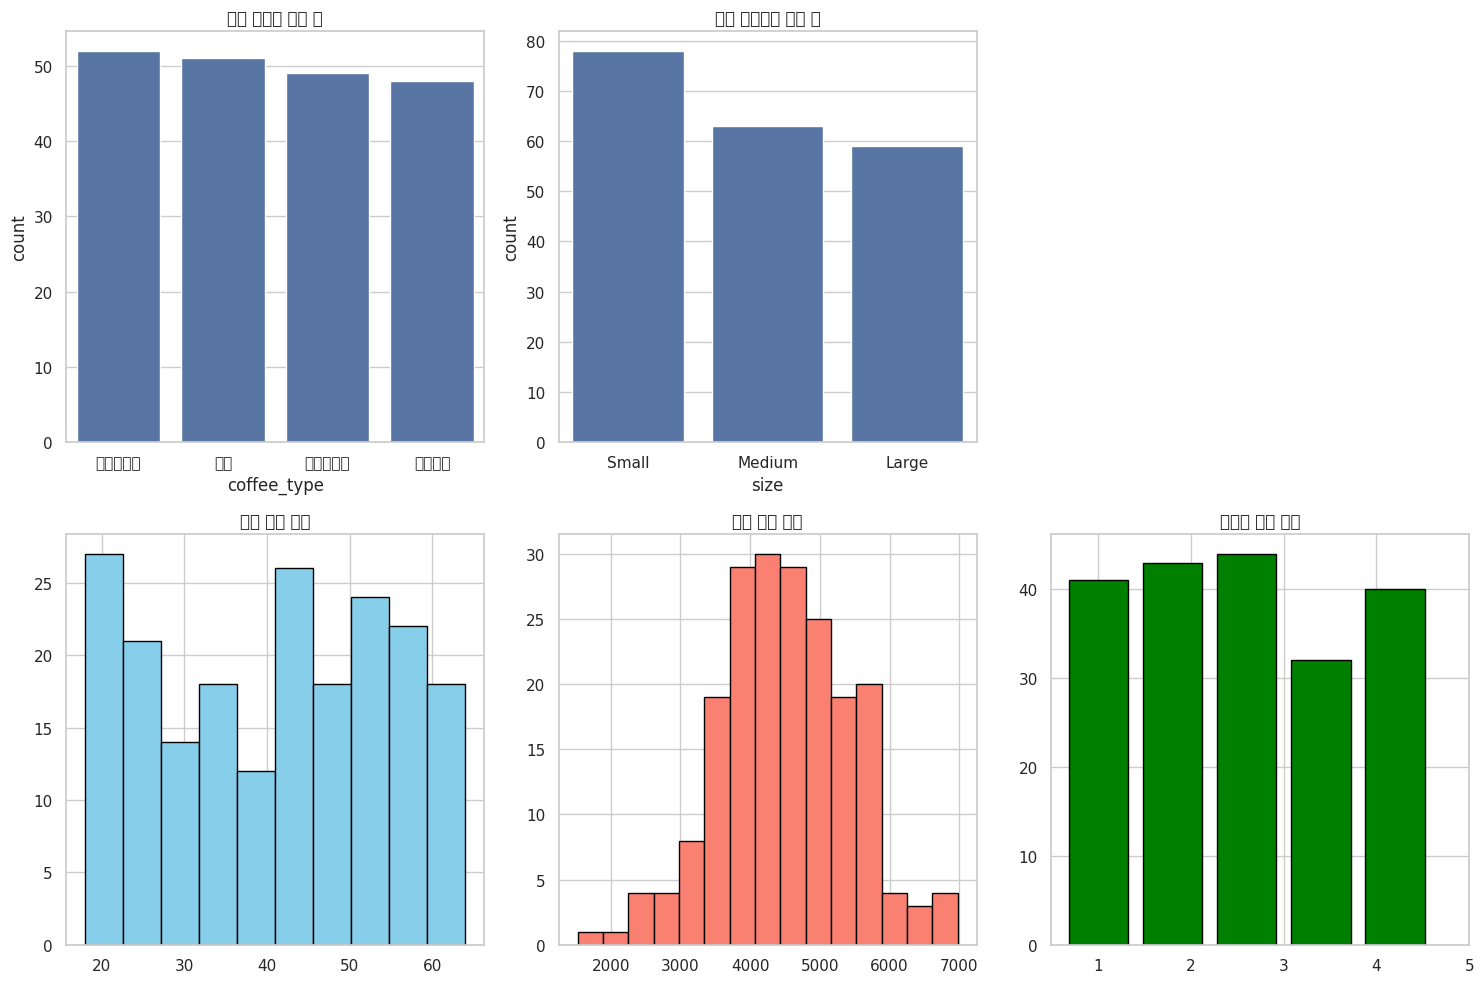

In [ ]:
#4.2. 질적 변수는 막대그래프, 양적 변수는 히스토그램 시각화
sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))

# 1. 질적 변수 - 막대그래프
plt.subplot(2, 3, 1)
sns.countplot(data=cafe_data, x='coffee_type',
              order=cafe_data['coffee_type'].value_counts().index)
plt.title('커피 종류별 주문 수')

plt.subplot(2, 3, 2)
sns.countplot(data=cafe_data, x='size',
              order=['Small', 'Medium', 'Large'])
plt.title('커피 사이즈별 주문 수')

# 2. 양적 변수 - 히스토그램
plt.subplot(2, 3, 4)
plt.hist(cafe_data['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('고객 나이 분포')

plt.subplot(2, 3, 5)
plt.hist(cafe_data['price'], bins=15, color='salmon', edgecolor='black')
plt.title('커피 가격 분포')

plt.subplot(2, 3, 6)
plt.hist(cafe_data['satisfaction'], bins=5, color='green', edgecolor='black',
         align='left', rwidth=0.8)
plt.xticks([1, 2, 3, 4, 5])
plt.title('만족도 점수 분포')

plt.tight_layout()
plt.show()

커피 타입별 평균 가격:  coffee_type
라떼       4427.990200
아메리카노    4440.271127
에스프레소    4688.748054
카푸치노     4471.629172
Name: price, dtype: float64


/tmp/ipython-input-21-2299822780.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')
/tmp/ipython-input-21-2299822780.py:16: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-2299822780.py:16: UserWarning: Glyph 46524 (\N{HANGUL SYLLABLE DDE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-2299822780.py:16: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-2299822780.py:16: UserWarning: Glyph 47700 (\N{HANGUL SYLLABLE ME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-2299822780.py:16: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaV

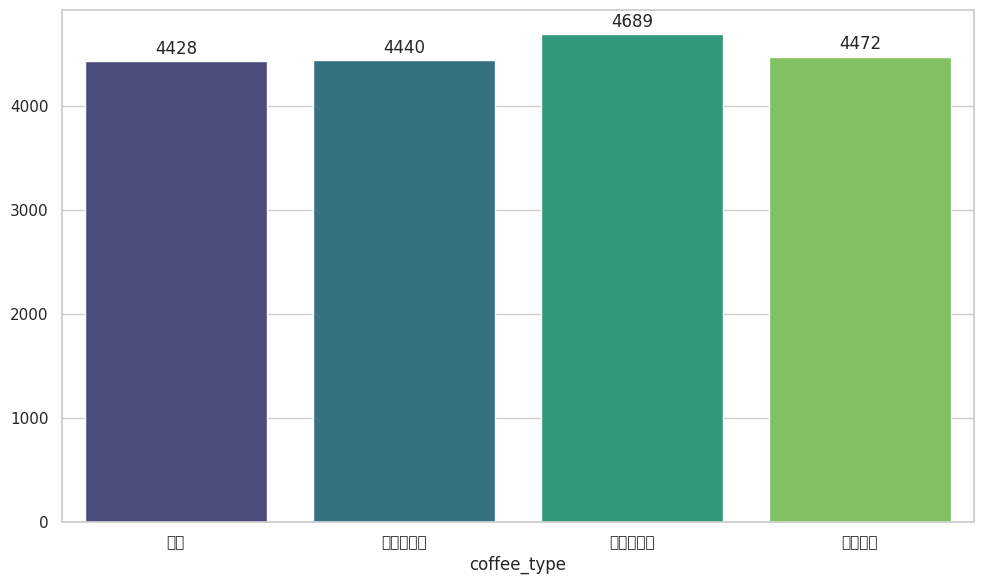

In [ ]:
#4.3. 커피 타입별 평균 가격 계산 및 막대그래프 그리기
avg_price=cafe_data.groupby('coffee_type')['price'].mean()
print('커피 타입별 평균 가격: ', avg_price)

plt.figure(figsize=(10, 6))

barplot = sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')
plt.xticks(rotation=0)
plt.tight_layout()

In [ ]:
#5. 상관관계 탐색

# 아이스크림 판매 데이터 생성
np.random.seed(101)

n_days = 100
temperature = np.random.normal(25, 8, n_days)  # 기온
humidity = np.random.normal(60, 15, n_days)    # 습도

# 아이스크림 판매량 = 기온에 비례 + 습도에 반비례 + 노이즈
ice_cream_sales = (temperature * 10 - humidity * 2 +
                   np.random.normal(0, 30, n_days) + 200)
ice_cream_sales = np.clip(ice_cream_sales, 0, None)  # 음수 제거

weather_data = pd.DataFrame({
    'day': range(1, n_days+1),
    'temperature': temperature,
    'humidity': humidity,
    'ice_cream_sales': ice_cream_sales
})

print("🍦 아이스크림 판매 데이터")
print(weather_data.head())


🍦 아이스크림 판매 데이터
   day  temperature   humidity  ice_cream_sales
0    1    46.654799  84.101698       489.959285
1    2    30.025062  43.264350       445.603228
2    3    32.263756  39.219322       496.759345
3    4    29.030606  40.055099       431.062264
4    5    30.208944  60.621899       385.455463


<Axes: >

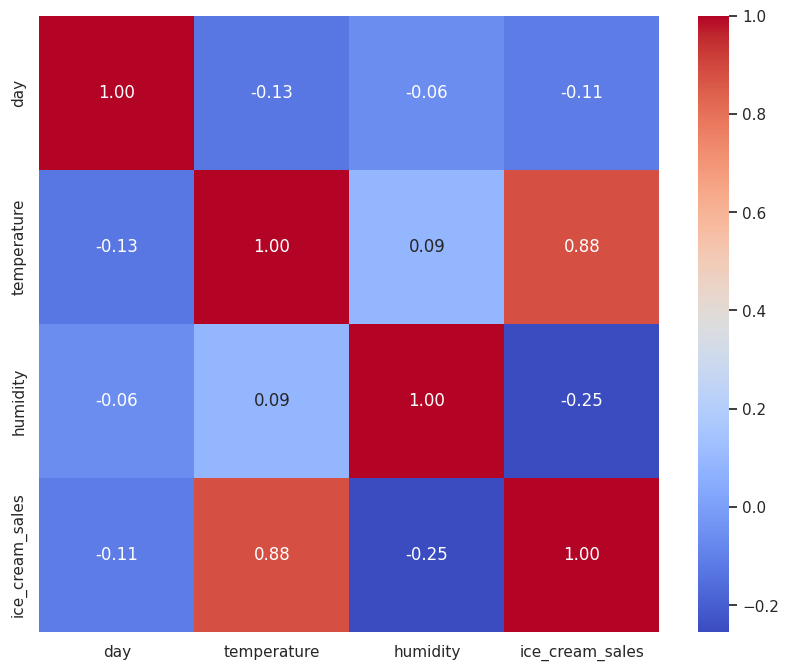

In [ ]:
#5.1. weather_data의 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(weather_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
#5.2. 기온과 아이스크림 판매량 간의 상관계수 계산하기
print('기온과 아이스크림 판매량 상관계수: ', weather_data['temperature'].corr(weather_data['ice_cream_sales']))

기온과 아이스크림 판매량 상관계수:  0.8786074601247177


<Axes: xlabel='temperature', ylabel='ice_cream_sales'>

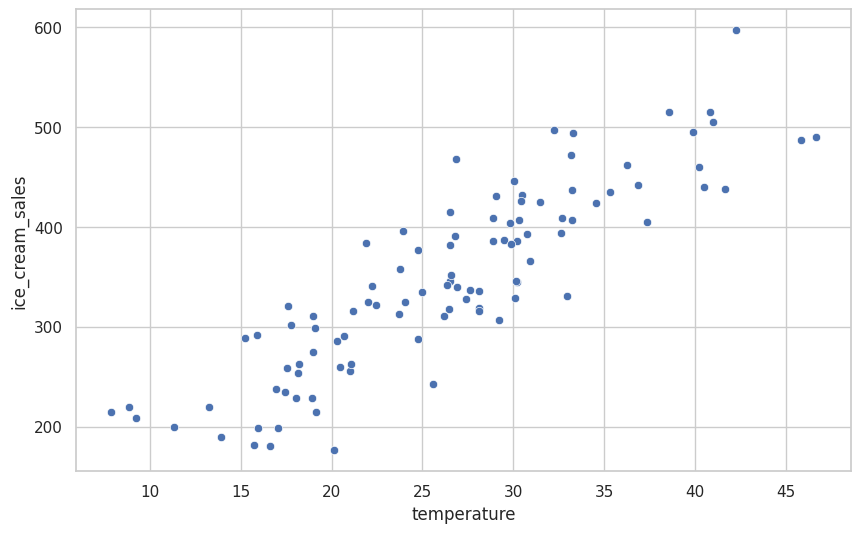

In [ ]:
#5.3. 산점도를 그려서 기온, 판매량의 관계 시각화하기
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_data, x='temperature', y='ice_cream_sales')

<Axes: xlabel='humidity', ylabel='ice_cream_sales'>

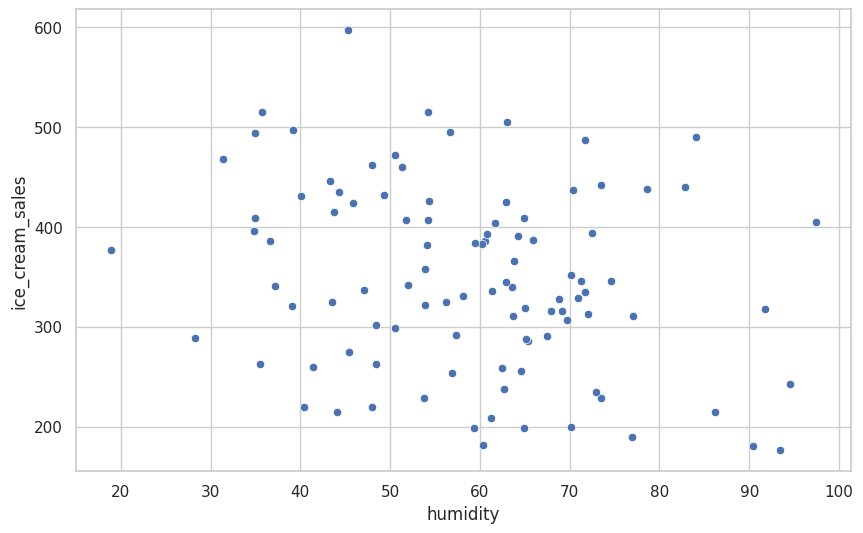

In [ ]:
#5.4. 습도와 아이스크림 판매량의 관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_data, x='humidity', y='ice_cream_sales')

In [ ]:
#5.5. 상관관계가 인과관계를 의미하는가
#인과관계의 일부분이 상관관계를 설명할 수는 있으나 상관관계가 인과관계를 설명하기에는 한계가 있을 듯

In [ ]:
#6. 확률분포 (정규분포)

# 성인 남성 키 데이터 (정규분포)
np.random.seed(202)

heights = np.random.normal(172, 6, 1000)  # 평균 172cm, 표준편차 6cm

height_data = pd.DataFrame({
    'person_id': range(1, 1001),
    'height': heights
})

print("📏 성인 남성 키 데이터")
print(height_data.describe())



📏 성인 남성 키 데이터
         person_id       height
count  1000.000000  1000.000000
mean    500.500000   171.758897
std     288.819436     5.885099
min       1.000000   155.205447
25%     250.750000   167.823862
50%     500.500000   171.630446
75%     750.250000   175.922833
max    1000.000000   192.552602


<Axes: xlabel='height', ylabel='Count'>

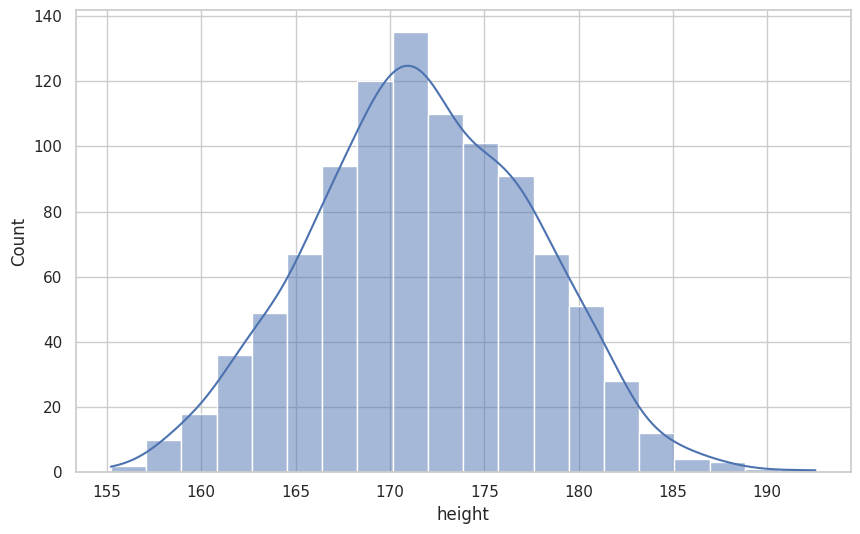

In [ ]:
#6.1. 키 데이터의 히스토그램을 그리고 정규분포 곡선을 함께 표시하기
plt.figure(figsize=(10, 6))
sns.histplot(height_data['height'], bins=20, kde=True)

In [ ]:
#6.2. 68-95-99.7 규칙을 확인해보세요 (평균 ± 1σ, 2σ, 3σ 범위의 데이터 비율을 출력해보세요.)

mean = height_data['height'].mean()
std = height_data['height'].std()
total_count = len(height_data)



# 평균 ± 1σ (약 68%)
within_1_std_count = height_data[
    (height_data['height'] > mean - 1 * std) & (height_data['height'] < mean + 1 * std)
].shape[0]
percentage_1_std = (within_1_std_count / total_count) * 100

# 평균 ± 2σ (약 95%)
within_2_std_count = height_data[
    (height_data['height'] > mean - 2 * std) & (height_data['height'] < mean + 2 * std)
].shape[0]
percentage_2_std = (within_2_std_count / total_count) * 100

# 평균 ± 3σ (약 99.7%)
within_3_std_count = height_data[
    (height_data['height'] > mean - 3 * std) & (height_data['height'] < mean + 3 * std)
].shape[0]
percentage_3_std = (within_3_std_count / total_count) * 100




print(f"데이터 평균(μ): {mean:.2f}, 표준편차(σ): {std:.2f}\n")
print("--- 68-95-99.7 규칙 확인 ---")
print(f"평균 ± 1σ 범위 내 데이터 비율: {percentage_1_std:.1f}% (이론값: 약 68%)")
print(f"평균 ± 2σ 범위 내 데이터 비율: {percentage_2_std:.1f}% (이론값: 약 95%)")
print(f"평균 ± 3σ 범위 내 데이터 비율: {percentage_3_std:.1f}% (이론값: 약 99.7%)")

데이터 평균(μ): 171.76, 표준편차(σ): 5.89

--- 68-95-99.7 규칙 확인 ---
평균 ± 1σ 범위 내 데이터 비율: 67.0% (이론값: 약 68%)
평균 ± 2σ 범위 내 데이터 비율: 95.9% (이론값: 약 95%)
평균 ± 3σ 범위 내 데이터 비율: 99.8% (이론값: 약 99.7%)


In [ ]:
#6.3. 180cm 이상인 사람의 비율 계산
print('180cm 이상인 사람의 비율: ', (height_data['height'] >= 180).mean())

180cm 이상인 사람의 비율:  0.084


In [ ]:
#6.4. 키가 160cm~180cm 사이인 사람의 비율 계산
print('160cm~180cm 사이인 사람의 비율: ', ((height_data['height'] >= 160) & (height_data['height'] <= 180)).mean())

160cm~180cm 사이인 사람의 비율:  0.894


In [ ]:
#7. 표본추출 (모집단-표본)

# 전국 대학생 용돈 모집단 데이터 (가상)
np.random.seed(303)

# 모집단: 전국 대학생 100,000명
population_size = 100000
population_allowance = np.random.gamma(2, 15, population_size)  # 치우친 분포

print("💰 전국 대학생 용돈 모집단 정보")
print(f"모집단 크기: {population_size:,}명")
print(f"모집단 평균: {population_allowance.mean():.2f}만원")
print(f"모집단 표준편차: {population_allowance.std():.2f}만원")


💰 전국 대학생 용돈 모집단 정보
모집단 크기: 100,000명
모집단 평균: 29.96만원
모집단 표준편차: 21.11만원


In [ ]:
#7.1. 크기가 다른 표본들(n=10, 50, 100, 500)을 각각 추출
sample_sizes = [10, 50, 100, 500]

for n in sample_sizes:
    sample_allowance = np.random.choice(population_allowance, n)
    print(f'크기가 {n}인 표본')
    print(sample_allowance)

크기가 10인 표본
[31.37283582 57.50904669 18.70344182 25.16178087  2.91601205 13.40180329
 19.35293011 14.55032956 31.32383062 25.98271097]
크기가 50인 표본
[63.17014446  7.27875639 36.71240674 15.97292953 63.92130221  9.96824573
 22.81772072 39.37765015 11.0255536  33.24657865 24.53550013 44.33651332
 21.60945562 48.27962251 18.90424915 67.64710223 18.36248592 27.81276899
  6.05099212 69.04591591 29.74002049 16.13638245 38.46785062 73.72316001
 28.32965714 41.5598478  14.5263752  42.34603925 27.29775981 65.49964743
 18.13787067 24.70928277 29.69732609 33.58155358 39.78464655 12.04009431
 20.53085228  6.84543801 11.62583938 52.85515806 39.936031   22.05021928
 16.90964378  4.86759566 48.7663665  26.38849145 23.93190355 14.60556539
 30.78433829 38.20353324]
크기가 100인 표본
[ 41.96935752  15.12490716  20.63416208  27.15514553   5.30026774
  39.39303717  94.12368832  26.29509377  10.00433252  16.50526463
  15.52302988   7.37381982  41.41601835  24.94345461  30.85816352
  23.8113939   12.62107595   7.3882

In [ ]:
#7.2. 각 표본의 평균과 표준편차를 계산하고 모집단 값과 비교
pop_mean = population_allowance.mean()
pop_std = population_allowance.std()

sample_sizes = [10, 50, 100, 500]


for n in sample_sizes:
    sample = np.random.choice(population_allowance, size=n, replace=False)

    sample_mean = sample.mean()
    sample_std = sample.std(ddof=1)

    print(f"\n[크기 n={n}인 표본]")
    print(f"  - 표본 평균: {sample_mean:.2f}만원 (모집단 평균: {pop_mean:.2f})")
    print(f"  - 표본 표준편차: {sample_std:.2f}만원 (모집단 표준편차: {pop_std:.2f})")


[크기 n=10인 표본]
  - 표본 평균: 39.28만원 (모집단 평균: 29.96)
  - 표본 표준편차: 20.95만원 (모집단 표준편차: 21.11)

[크기 n=50인 표본]
  - 표본 평균: 31.59만원 (모집단 평균: 29.96)
  - 표본 표준편차: 19.73만원 (모집단 표준편차: 21.11)

[크기 n=100인 표본]
  - 표본 평균: 30.07만원 (모집단 평균: 29.96)
  - 표본 표준편차: 17.74만원 (모집단 표준편차: 21.11)

[크기 n=500인 표본]
  - 표본 평균: 29.68만원 (모집단 평균: 29.96)
  - 표본 표준편차: 23.21만원 (모집단 표준편차: 21.11)


In [ ]:
#7.3. 표본 크기가 커질수록 모집단 평균에 얼마나 가까워지는가

/tmp/ipython-input-50-3887133458.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


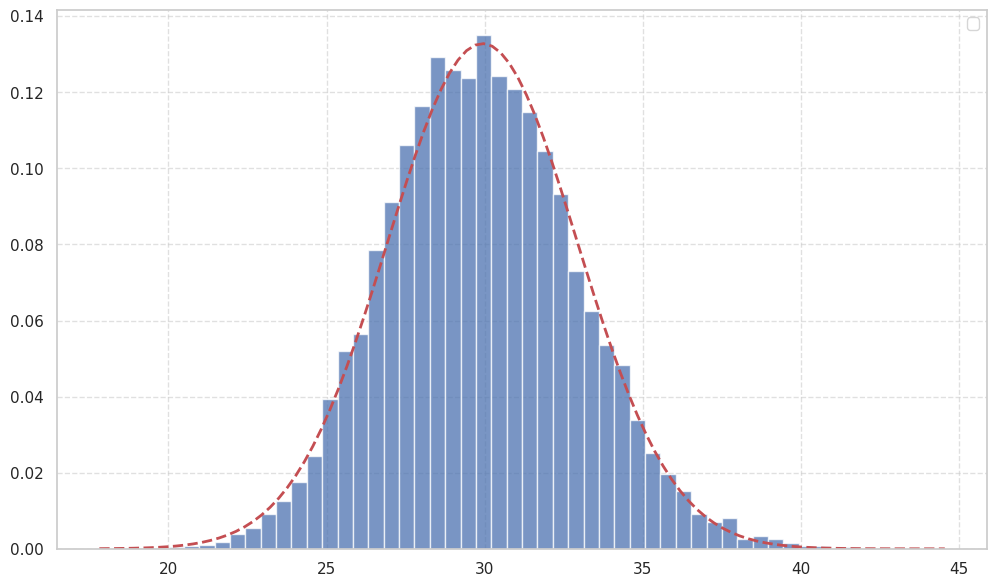

In [ ]:
#7.4. 여러 번의 표본 추출을 반복하여 표본평균의 분포 출력

from scipy.stats import norm

#표본 추출 반복 설정
n_replications = 10000
sample_size = 50
sample_means = []

for _ in range(n_replications):
    sample = np.random.choice(population_allowance, size=sample_size, replace=False)
    sample_means.append(sample.mean())
plt.figure(figsize=(12, 7))
plt.hist(sample_means, bins=50, density=True, alpha=0.75)

mean_of_means = np.mean(sample_means)
std_of_means = np.std(sample_means)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_of_means, std_of_means)
plt.plot(x, p, 'r--', linewidth=2)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

In [ ]:
#8. 이상값 탐지

# 회사원 연봉 데이터 (이상값 포함)
np.random.seed(404)

# 일반 직원 연봉 (정규분포)
normal_salaries = np.random.normal(4000, 800, 95)

# 임원 연봉 (이상값)
executive_salaries = np.random.normal(15000, 2000, 5)

all_salaries = np.concatenate([normal_salaries, executive_salaries])

salary_data = pd.DataFrame({
    'employee_id': range(1, 101),
    'annual_salary': all_salaries
})

print("💼 회사원 연봉 데이터")
print(salary_data.describe())


💼 회사원 연봉 데이터
       employee_id  annual_salary
count   100.000000     100.000000
mean     50.500000    4614.056781
std      29.011492    2358.026794
min       1.000000    2043.022815
25%      25.750000    3618.348192
50%      50.500000    4075.983326
75%      75.250000    4733.313483
max     100.000000   16678.798919


<Axes: ylabel='annual_salary'>

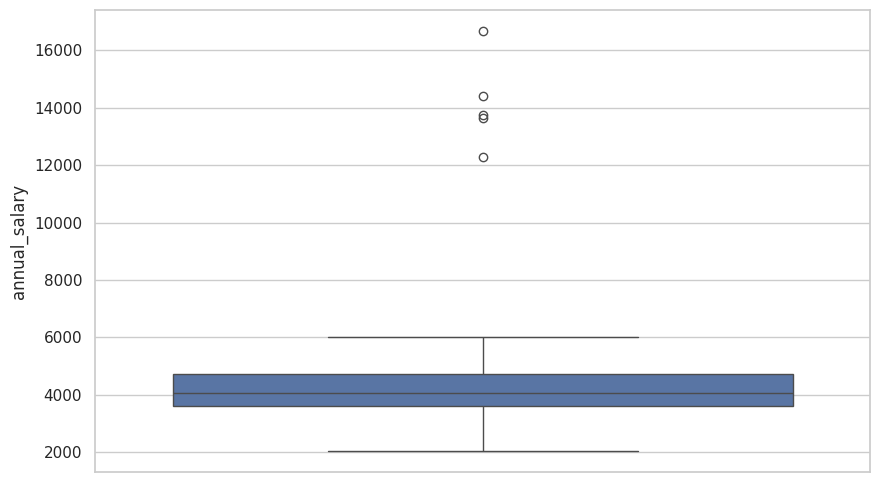

In [ ]:
#8.1. 상자그림을 그려서 이상값 시각화하기
plt.figure(figsize=(10, 6))
sns.boxplot(y='annual_salary', data=salary_data)

In [ ]:
#8.2. IQR 방법으로 이상값 수치적으로 찾기
Q1 = salary_data['annual_salary'].quantile(0.25)
Q3 = salary_data['annual_salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"하한값: {lower_bound}")
print(f"상한값: {upper_bound}")

outliers = salary_data[(salary_data['annual_salary'] < lower_bound) | (salary_data['annual_salary'] > upper_bound)]

print(outliers)

IQR: 1114.9652904084783
하한값: 1945.9002568494468
상한값: 6405.76141848336
    employee_id  annual_salary
95           96   16678.798919
96           97   14407.696906
97           98   12298.717334
98           99   13652.838809
99          100   13736.799967


In [ ]:
#8.3. 이상값을 제거하기 전, 후의 평균과 중앙값 비교
print('이상값 제거 전 평균: ', salary_data['annual_salary'].mean())
print('이상값 제거 전 중앙값: ', salary_data['annual_salary'].median())


salary_data_inliers = salary_data[(salary_data['annual_salary'] >= lower_bound) & (salary_data['annual_salary'] <= upper_bound)]
print('이상값 제거 후 평균: ', salary_data_inliers['annual_salary'].mean())
print('이상값 제거 후 중앙값: ',salary_data_inliers['annual_salary'].median())


이상값 제거 전 평균:  4614.056781109981
이상값 제거 전 중앙값:  4075.983325993772
이상값 제거 후 평균:  4111.9034334360895
이상값 제거 후 중앙값:  4021.0119580333203


In [ ]:
#8.4. 어떤 경우에 이상값을 제거해야 하는가
#이상값으로 인한 정상 데이터의 왜곡이 심한 경우

In [ ]:
#9. 데이터 분포 비교

# 세 매장의 일일 매출 데이터
np.random.seed(505)

# 매장별 특성이 다른 매출 분포
store_a_sales = np.random.normal(800, 100, 90)   # 안정적
store_b_sales = np.random.exponential(600, 90)   # 치우친 분포
store_c_sales = np.random.uniform(400, 1200, 90) # 균등분포

sales_data = pd.DataFrame({
    'store': ['A']*90 + ['B']*90 + ['C']*90,
    'daily_sales': np.concatenate([store_a_sales, store_b_sales, store_c_sales])
})

print("🏪 세 매장의 일일 매출 데이터")
print(sales_data.groupby('store')['daily_sales'].describe())


🏪 세 매장의 일일 매출 데이터
       count        mean         std         min         25%         50%  \
store                                                                      
A       90.0  794.927382   95.573605  574.697691  734.660135  790.687193   
B       90.0  727.292560  694.047674   15.861679  219.729330  501.261904   
C       90.0  848.842069  228.457501  403.269401  642.649898  855.099528   

               75%          max  
store                            
A       856.350767  1033.281073  
B      1037.378317  3783.321720  
C      1065.125671  1193.574079  


In [ ]:
#9.1. 각 매장의 평균, 중앙값, 표준편차 계산

store_stats = sales_data.groupby('store')['daily_sales'].agg(['mean', 'median', 'std'])

print(store_stats)

             mean      median         std
store                                    
A      794.927382  790.687193   95.573605
B      727.292560  501.261904  694.047674
C      848.842069  855.099528  228.457501


<Axes: xlabel='daily_sales', ylabel='Count'>

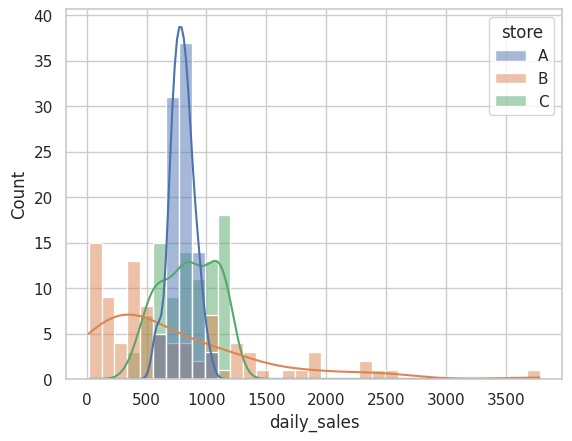

In [ ]:
#9.2. 세 매장의 매출 분포를 비교하는 히스토그램

sns.histplot(x = 'daily_sales', hue='store', kde=True, data=sales_data)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


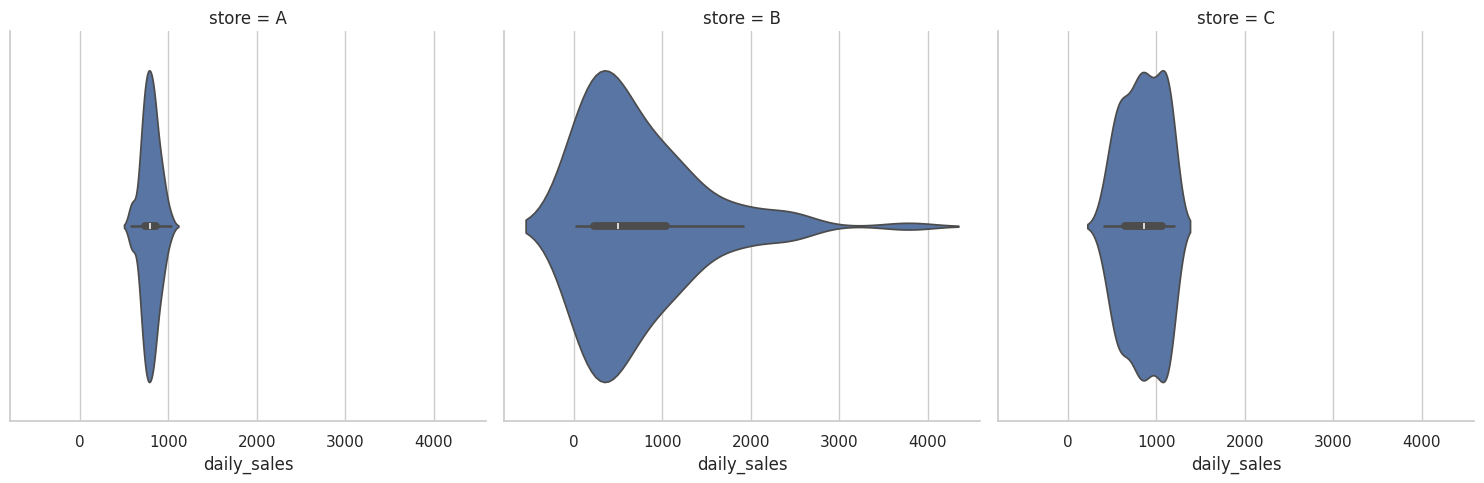

In [ ]:
#9.3. 바이올린 플롯을 사용해서 분포 모양 비교

g = sns.FacetGrid(sales_data, col="store", height=5, sharey=False)

g.map(sns.violinplot, "daily_sales")

<Axes: xlabel='store', ylabel='daily_sales'>

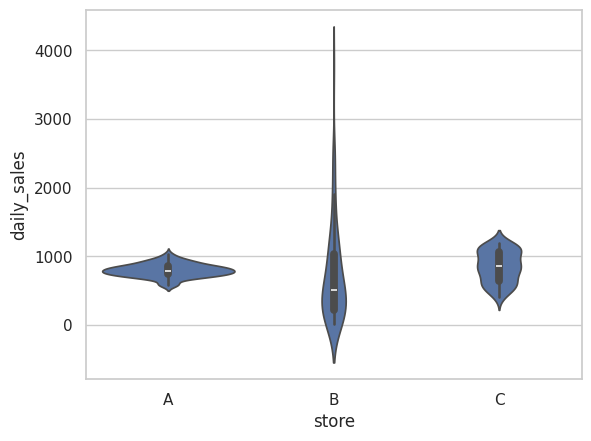

In [ ]:
sns.violinplot(x='store', y='daily_sales', data=sales_data)

#매장별 일일 매출 데이터의 분포와 밀도를 시각적으로 보여줌

#A: 정규분포, 대부분의 매출이 평균 근처에서 발새으 안정적
#B: 아래쪽은 넓고 위쪽으로 갈수록 꼬리게 길게 늘어진 지수분포 모양, 매출이 낮은 날이 대부분, 높은 날은 매우 크다
#C: 직사각형 모양, 균등분포, 특정 매출 구간 내에 발생 매출액의 확률이 비슷하다

#두께: 해당 값에 데이터에 얼마나 밀집되어 있는가
  #A: 중간에 가장 두껍다 > 평균 근처에 데이터가 가장 밀집되어 있다

In [ ]:
#9.4. 어떤 매장이 가장 안정적인 매출을 보이는가

#A매장이 가장 안정적이다
#안정적이다 = 변동성이 적다 = 표준편차가 적다 = std가 95.6으로 가장 작다

In [ ]:
#10. 시계열 데이터

# 1년간 웹사이트 방문자 수 데이터
np.random.seed(606)

dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
n_days = len(dates)

# 계절성 + 주말 효과 + 트렌드 + 노이즈
base_visitors = 1000
seasonal_effect = 200 * np.sin(2 * np.pi * np.arange(n_days) / 365.25)
weekend_effect = np.where(pd.to_datetime(dates).weekday >= 5, 150, 0)
trend = np.linspace(0, 300, n_days)
noise = np.random.normal(0, 50, n_days)

visitors = base_visitors + seasonal_effect + weekend_effect + trend + noise

website_data = pd.DataFrame({
    'date': dates,
    'visitors': visitors
})

print("🌐 웹사이트 방문자 수 데이터")
print(website_data.head())


🌐 웹사이트 방문자 수 데이터
        date     visitors
0 2023-01-01  1188.437680
1 2023-01-02   966.810106
2 2023-01-03  1075.466558
3 2023-01-04  1135.715455
4 2023-01-05  1040.652284


<Axes: xlabel='date', ylabel='visitors'>

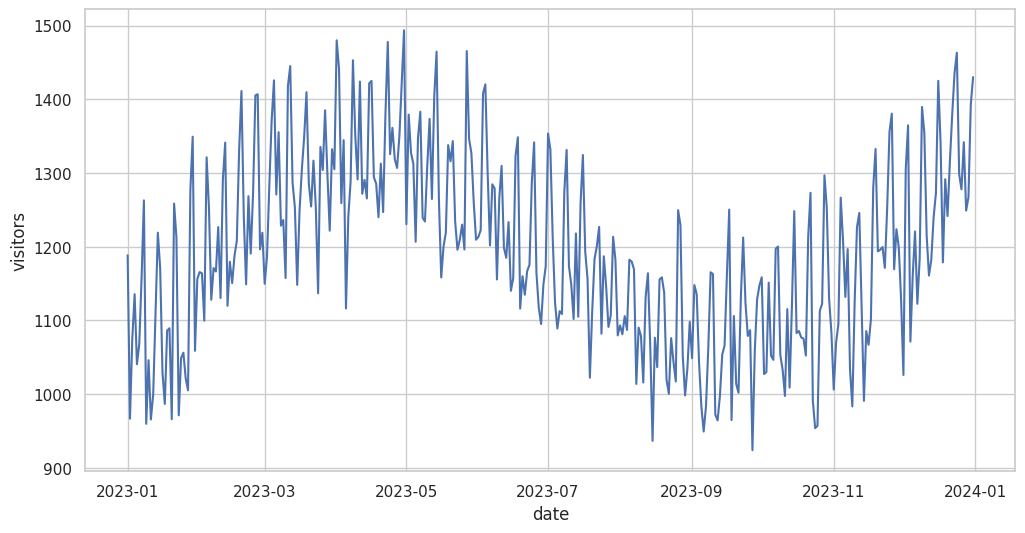

In [ ]:
#10.1 시간에 따른 방문자 수 변화를 선 그래프로 시각화

plt.figure(figsize=(12, 6))
sns.lineplot(data=website_data, x='date', y='visitors')

<Axes: xlabel='date'>

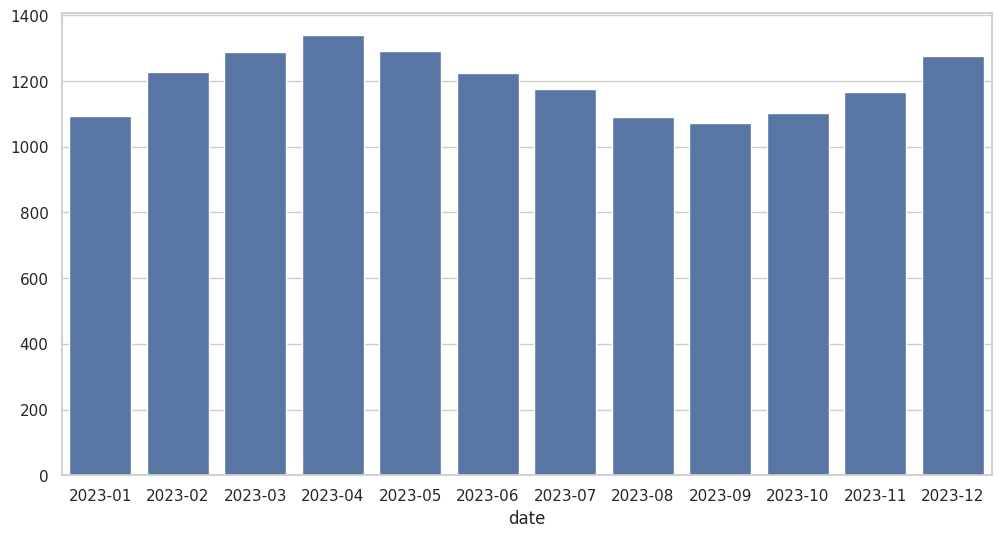

In [ ]:
#10.2. 월별 평균 방문자 수를 계산하고 막대그래프로 표시

monthly_visitors = website_data.groupby(website_data['date'].dt.to_period('M'))['visitors'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_visitors.index.astype(str), y=monthly_visitors.values)

<Axes: xlabel='day_of_week', ylabel='visitors'>

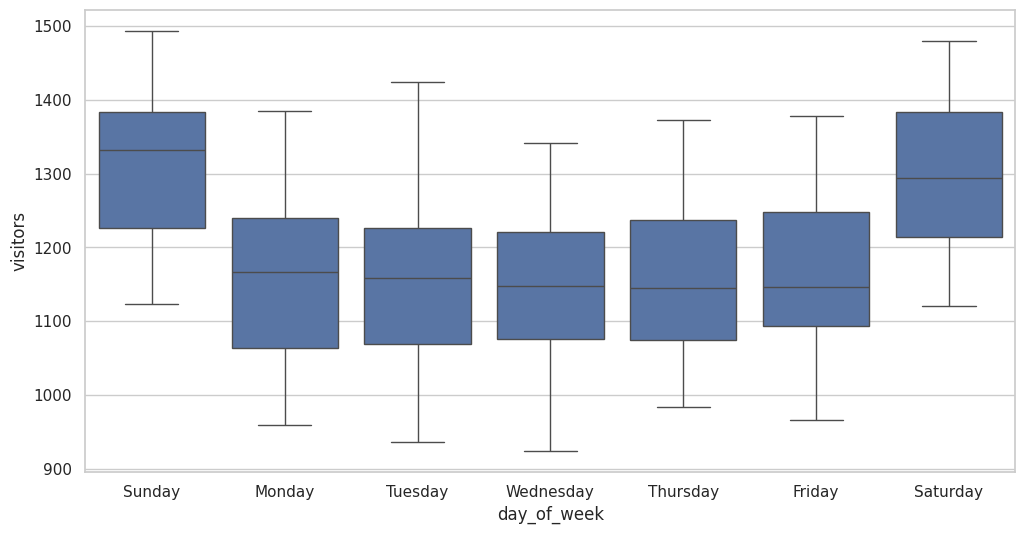

In [ ]:
#10.3. 요일별 방문자수 패턴 분석

website_data['day_of_week'] = website_data['date'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='visitors', data=website_data)


#주말의 박스가 주중보다 위에 있다 > 웹사이트 방문자 수가 확연히 증가한다
  #중앙값도 높이 있다 > 평균적인 방문자 수도 주중보다 높을 것이다

<Axes: xlabel='date', ylabel='visitors'>

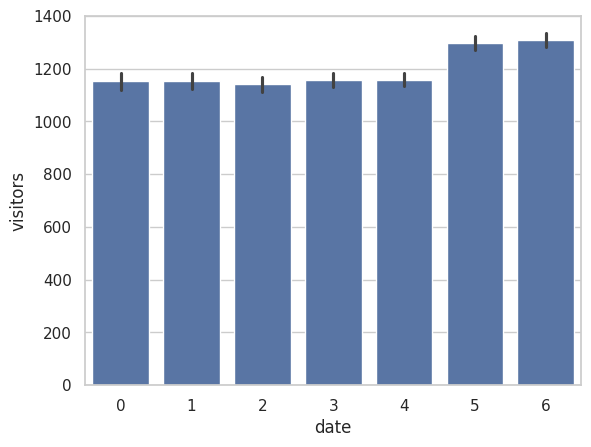

In [ ]:
sns.barplot(x=website_data['date'].dt.dayofweek, y=website_data['visitors'])